<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Reddit Data using Reddit API</h1>

In this live coding session, we leverage the Python Reddit API Wrapper (`PRAW`) to retrieve data from subreddits on [Reddit](https://www.reddit.com), and perform sentiment analysis using [`pipelines`](https://huggingface.co/docs/transformers/main_classes/pipelines) from [HuggingFace ( 🤗 the GitHub of Machine Learning )](https://techcrunch.com/2022/05/09/hugging-face-reaches-2-billion-valuation-to-build-the-github-of-machine-learning/), powered by [transformer](https://arxiv.org/pdf/1706.03762.pdf).

## Objectives

At the end of the session, you will 

- know how to work with APIs
- feel more comfortable navigating thru documentation, even inspecting the source code
- understand what a `pipeline` object is in HuggingFace
- perform sentiment analysis using `pipeline`
- run a python script in command line and get the results

## How to Submit

- At the end of each task, commit* the work into the repository you created before the assignment
- After completing all three tasks, make sure to push the notebook containing all code blocks and output cells to your repository you created before the assignment
- Submit the link to the notebook in Canvas

\***NEVER** commit a notebook displaying errors unless it is instructed otherwise. However, commit often; recall git ABC = **A**lways **B**e **C**ommitting.

## Tasks

### Task I: Instantiate a Reddit API Object

The first task is to instantiate a Reddit API object using [PRAW](https://praw.readthedocs.io/en/stable/), through which you will retrieve data. PRAW is a wrapper for [Reddit API](https://www.reddit.com/dev/api) that makes interacting with the Reddit API easier unless you are already an expert of [`requests`](https://docs.python-requests.org/en/latest/).

#### 1. Install packages

Please ensure you've ran all the cells in the `imports.ipynb`, located [here](https://github.com/FourthBrain/MLE-8/blob/main/assignments/week-3-analyze-sentiment-subreddit/imports.ipynb), to make sure you have all the required packages for today's assignment.

####  2. Create a new app on Reddit 

Create a new app on Reddit and save secret tokens; refer to [post in medium](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c) for more details.

- Create a Reddit account if you don't have one, log into your account.
- To access the API, we need create an app. Slight updates, on the website, you need to navigate to `preference` > `app`, or click [this link](https://www.reddit.com/prefs/apps) and scroll all the way down. 
- Click to create a new app, fill in the **name**, choose `script`, fill in  **description** and **redirect uri** ( The redirect URI is where the user is sent after they've granted OAuth access to your application (more info [here](https://github.com/reddit-archive/reddit/wiki/OAuth2)) For our purpose, you can enter some random url, e.g., www.google.com; as shown below.


    <img src="https://miro.medium.com/max/700/1*lRBvxpIe8J2nZYJ6ucMgHA.png" width="500"/>
- Jot down `client_id` (left upper corner) and `client_secret` 

    NOTE: CLIENT_ID refers to 'personal use script" and CLIENT_SECRET to secret.
    
    <div>
    <img src="https://miro.medium.com/max/700/1*7cGAKth1PMrEf2sHcQWPoA.png" width="300"/>
    </div>

- Create `secrets_reddit.py` in the same directory with this notebook, fill in `client_id` and `secret_id` obtained from the last step. We will need to import those constants in the next step.
    ```
    REDDIT_API_CLIENT_ID = "client_id"
    REDDIT_API_CLIENT_SECRET = "secret_id"
    REDDIT_API_USER_AGENT = "any string except bot; ex. My User Agent"
    ```
- Add `secrets_reddit.py` to your `.gitignore` file if not already done. NEVER push credentials to a repo, private or public. 

#### 3. Instantiate a `Reddit` object

Now you are ready to create a read-only `Reddit` instance. Refer to [documentation](https://praw.readthedocs.io/en/stable/code_overview/reddit_instance.html) when necessary.

In [1]:
!python -m pip install -U transformers praw torch numpy pandas

In [2]:
import transformers
import praw
import torch
import numpy as np
import pandas as pd

In [3]:
import praw
import secrets_reddit as sr

# Create a Reddit object which allows us to interact with the Reddit API
reddit = praw.Reddit(
    client_id = sr.REDDIT_API_CLIENT_ID,
    client_secret = sr.REDDIT_API_CLIENT_SECRET,
    user_agent = sr.REDDIT_API_USER_AGENT
)

In [4]:
print(reddit) 

<details>
<summary>Expected output:</summary>   

```<praw.reddit.Reddit object at 0x10f8a0ac0>```
</details>

#### 4. Instantiate a `subreddit` object

Lastly, create a `subreddit` object for your favorite subreddit and inspect the object. The expected outputs you will see are from `r/machinelearning` unless otherwise specified.

In [5]:
subreddit = reddit.subreddit("machinelearning")

What is the display name of the subreddit?

In [6]:
print(subreddit.display_name)

machinelearning


<details>
<summary>Expected output:</summary>   

    machinelearning
</details>

How about its title, is it different from the display name?

In [7]:
print(subreddit.title)

Machine Learning


<details>
<summary>Expected output:</summary>   

    Machine Learning
</details>

Print out the description of the subreddit:

In [8]:
print(subreddit.description)

**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
--------
+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
--------
+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
--------
+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
--------
+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ANews)
--------
***[@slashML on Twitter](https://twitter.com/slashML)***
--------
***[Chat with us on Slack](https://join.slack.com/t/rml-talk/shared_invite/enQtNjkyMzI3NjA2NTY2LWY0ZmRjZjNhYjI5NzYwM2Y0YzZhZWNiODQ3ZGFjYmI2NTU3YjE1ZDU5MzM2ZTQ4ZGJmOTFmNWVkMzFiMzVhYjg)***
--------
**Beginners:**
--------
Please have a look at [our FAQ and Link-Collection](http://www.reddit.com/r/MachineLearning/wiki/index)

[Metacademy](http://www.metacademy.org) is a great resource which compiles le

<details>
<summary>Expected output:</summary>

    **[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
    --------
    +[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
    --------
    +[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
    --------
    +[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
    --------
    +[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict
</details>

In [9]:
# fsl Let's look at some new submissions:

for submission in subreddit.new(limit=25):
    print(submission.title)

[D] ML integration into marketing department. Any data scraping tools that can help with the processes?
[P] Model explainability for 🤗 Diffusers. Get explanations for your generated images with the latest stable diffusion!
[D] Weird consequence of not freezing layers in Neural Network
[R] Emotion-based symbolic music (MIDI) generation
[R] Novel Methods for Drift Detection
[D] "A majority of respondents think that the scientific value of the majority of work in NLP is dubious"
[R] Deep Learning with a Small Training Batch (or Lack Thereof). Part 1
[D] Easily Run Stable Diffusion Image to Image mode
[D] Position embedding in Vision transformer
[D] Does anyone use performance profiling / flamegraphs for optimizing ML algorithms?
[D] What are some dead ideas in machine learning or machine learning textbooks?
[D] Simple Questions Thread
[D] What happened to Projection Pursuit?
[D] Can neural networks perceive time ?
[P] CatalyzeX Update - Now see code for papers as you're browsing IEEE and 

### Task II: Parse comments

#### 1. Top Posts of All Time

Find titles of top 10 posts of **all time** from your favorite subreddit. Refer to [Obtain Submission Instances from a Subreddit Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html)) if necessary. Verify if the titles match what you read on Reddit.

In [10]:
# try run this line, what do you see? press q once you are done
for submission in subreddit.top(limit=10):
    print(submission.title)

[Project] From books to presentations in 10s with AR + ML
[D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
[R] First Order Motion Model applied to animate paintings
[N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
[D] This AI reveals how much time politicians stare at their phone at work
[D] Types of Machine Learning Papers
[D] The machine learning community has a toxicity problem
I made a robot that punishes me if it detects that if I am procrastinating on my assignments [P]
[Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
[P] Using oil portraits and First Order Model to bring the paintings back to life


<details> <summary>Expected output:</summary>

    [Project] From books to presentations in 10s with AR + ML
    [D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
    [R] First Order Motion Model applied to animate paintings
    [N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
    [D] This AI reveals how much time politicians stare at their phone at work
    [D] Types of Machine Learning Papers
    [D] The machine learning community has a toxicity problem
    [Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
    [P] Using oil portraits and First Order Model to bring the paintings back to life
    [D] Convolution Neural Network Visualization - Made with Unity 3D and lots of Code / source - stefsietz (IG)    
</details>

#### 2. Top 10 Posts of This Week

What are the titles of the top 10 posts of **this week** from your favorite subreddit?

In [11]:
for submission in subreddit.top(time_filter='week', limit=10):
    print(submission.title)

[P] Run Stable Diffusion locally with a web UI + artist workflow video
[D] StableDiffusion v1.4 is entirely public. What do you think about Stability.ai ?
[P] Einstein Instant NeRF
[D] How to Run Stable Diffusion (Locally and in Colab)
[D][N]"Mudge learned that Twitter had never acquired proper legal rights to training material used to build Twitter's key Machine Learning models. The Machine Learning models at issue were some of the core models running the company's most basic products, like which Tweets to show each user."
[D] ML for Good
[D] What are some dead ideas in machine learning or machine learning textbooks?
[P] Run stable diffusion in google colab including image2image and inpainting
[D] "A majority of respondents think that the scientific value of the majority of work in NLP is dubious"
[D] A thought I had on Yann LeCun's recent paper "A Path Towards Autonomous Machine Intelligence"


<details><summary>Expected output:</summary>

    [N] Ian Goodfellow, Apple’s director of machine learning, is leaving the company due to its return to work policy. In a note to staff, he said “I believe strongly that more flexibility would have been the best policy for my team.” He was likely the company’s most cited ML expert.
    [R][P] Thin-Plate Spline Motion Model for Image Animation + Gradio Web Demo
    [P] I’ve been trying to understand the limits of some of the available machine learning models out there. Built an app that lets you try a mix of CLIP from Open AI + Apple’s version of MobileNet, and more directly on your phone's camera roll.
    [R] Meta is releasing a 175B parameter language model
    [N] Hugging Face raised $100M at $2B to double down on community, open-source & ethics
    [P] T-SNE to view and order your Spotify tracks
    [D] : HELP Finding a Book - A book written for Google Engineers about foundational Math to support ML
    [R] Scaled up CLIP-like model (~2B) shows 86% Zero-shot on Imagenet
    [D] Do you use NLTK or Spacy for text preprocessing?
    [D] Democratizing Diffusion Models - LDMs: High-Resolution Image Synthesis with Latent Diffusion Models, a 5-minute paper summary by Casual GAN Papers
</details>

💽❓ Data Question:

Check out what other attributes the `praw.models.Submission` class has in the [docs](https://praw.readthedocs.io/en/stable/code_overview/models/submission.html). 

1. After having a chance to look through the docs, is there any other information that you might want to extract? How might this additional data help you?


### *Answer:*
The **praw.models.Submission** class provides a number of attributes including e.g. `author`, `comments`, `created_utc`, `num_comments`, `score`, `upvote_ratio`. These might help us understand the data better by giving us additional details about submissions to the subreddit we are looking at.


Write a sample piece of code below extracting three additional pieces of information from the submission below.

In [13]:
# fsl let's return to the top 10 machinelearning submissions of all time:

from datetime import datetime              # for unix time conversion

def unix2hu_time (unix_time):
    """Assumes unix_time is an integer
       Returns human-readable date, time (GMT)"""
    
    assert isinstance(unix_time, int), "Unix time expected as type int"
    
    return datetime.utcfromtimestamp(unix_time).strftime('%Y-%m-%d %H:%M:%S GMT')
    
    
for submission in subreddit.top(limit=10):
    print(
        f'{submission.title}\n\t'
        f'author:\t{submission.author}\n\t'
        f'name:\t{submission.name}\n\t'
        f'score:\t{submission.score}\n\t'
        f'upvote_ratio:\t{submission.upvote_ratio}\n\t'
        f'num_comments:\t{submission.num_comments}\n\t'
        f'created_utc:\t{submission.created_utc} aka '
        f'{unix2hu_time(int(submission.created_utc))}\n'
    )

[Project] From books to presentations in 10s with AR + ML
	author:	cyrildiagne
	name:	t3_gh1dj9
	score:	7407
	upvote_ratio:	0.99
	num_comments:	183
	created_utc:	1589116794.0 aka 2020-05-10 13:19:54 GMT

[D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
	author:	TheInsaneApp
	name:	t3_kuc6tz
	score:	5642
	upvote_ratio:	0.98
	num_comments:	128
	created_utc:	1610274636.0 aka 2021-01-10 10:30:36 GMT

[R] First Order Motion Model applied to animate paintings
	author:	programmerChilli
	name:	t3_g7nfvb
	score:	4661
	upvote_ratio:	0.97
	num_comments:	110
	created_utc:	1587788843.0 aka 2020-04-25 04:27:23 GMT

[N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
	author:	TheInsaneApp
	name:	t3_lui92h
	score:	4572
	upvote_ratio:	0.97
	num_comments:	230
	created_utc:	1614525148.0 aka 2021-02-28 15:12:28 GMT

[D] This AI reveals how much time politicians star

💽❓ Data Question:

2. Is there any information available that might be a concern when it comes to Ethical Data?

### *Answer:*
Protecting the privacy of personal data is a paramount ethical concern in responsible AI. In this case, the list of *typical attributes* for Reddit submissions that are made accessible by the official API doesn't appear to disclose significant personally identifiable information, with the possible exception of the submission's 'author' (see for example `author:	yusuf-bengio` in the above list). Presumably, writers are aware of the fact that their submissions will be publicly tied to the their account's given 'author' name; however, this raises the possibility of misattribution, e.g., when a writer chooses to spoof a well-known authority in the field. In addition, since the above data indicate that Reddit permits authors to use a handle instead of their real name, posts may contain misinformation or even deliberate disinformation, since writers are not held directly accountable in a public forum for their content--a problem common to social media platforms and indeed to the growing mass of 'information' available worldwide on the internet.

#### 3. Comment Code

Add comments to the code block below to describe what each line of the code does (Refer to [Obtain Comment Instances Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html) when necessary). The code is adapted from [this tutorial](https://praw.readthedocs.io/en/stable/tutorials/comments.html)

The purpose is 
1. to understand what the code is doing 
2. start to comment your code whenever it is not self-explantory if you have not (others will thank you, YOU will thank you later 😊) 

In [14]:
%%time                                   
from praw.models import MoreComments

# Create list 'top-comments' of top-level comment body
# from each selected submission:
top_comments = []

# Loop through selected submissions (all-time top 10 for subreddit):
for submission in subreddit.top(limit=10):              
    # Loop through top-level comments for ea. submission:
    for top_level_comment in submission.comments:
        # Skip if a 'MoreComments' object ('load more comments', 'continue this thread')
        if isinstance(top_level_comment, MoreComments):
            continue
        # Else add body of top-level comments to list
        top_comments.append(top_level_comment.body)

CPU times: user 127 ms, sys: 4.53 ms, total: 132 ms
Wall time: 1min 52s


#### 4. Inspect Comments

How many comments did you extract from the last step? Examine a few comments. 

In [15]:
#YOUR CODE HERE  # the answer may vary 693 for r/machinelearning
print(f'Total # top-level comments retrieved from the ',
      f'\nall-time top 10 submissions to the machinelearning ',
      f'\nsubreddit is: {len(top_comments)}')

Total # top-level comments retrieved from the  
all-time top 10 submissions to the machinelearning  
subreddit is: 741


In [16]:
import random

[random.choice(top_comments) for i in range(15)]

['Can someone explain the exact way to do this please ?',
 'That sound is so bad, it annoyed me with my headphones a meter away from me',
 "So, laptops and tabs/tablets are fine, phones are not.\n\nthey can be taking notes or working.\n\nIf its so important make a no phones rule, otherwise that's like judging a lions hunting ability by the time it sleeps.",
 '"We rediscovered something known 30 years ago and we didn\'t cite it"',
 'The next step must be the harry potter newspapers.',
 '“Here’s another game that we ruined”',
 'If I send you a set of music can you add visual for me & add it to youtube?',
 'gonna take shrooms then revisit this.',
 'Givin the ol Harry potter treatment',
 'I’m convinced Van Gogh’s self portrait was in the training/input.',
 "I hate and at the same time love that you feel like you can just about make out what the object or scene depicted is, yet after a moment or two you realize that whatever you've seen wasn't there, like a mirage.",
 "> However, the *toxic

<details> <summary>Some of the comments from `r/machinelearning` subreddit are:</summary>

    ['Awesome visualisation',
    'Similar to a stack or connected neurons.',
    'Will this Turing pass the Turing Test?']
</details>

💽❓ Data Question:

3. After having a chance to review a few samples of 5 comments from the subreddit, what can you say about the data? 

HINT: Think about the "cleanliness" of the data, the content of the data, think about what you're trying to do - how does this data line up with your goal? 


### *Answer:*
With respect to the task of sentiment analysis, we can see from the random sample of comments above that the extracted data is *not particularly clean*: There are numerous (user) errors in submitted text, which will pose a challenge for many pre-trained NLP models to ingest & classify correctly, for example: 
* misspellings
* non-standard, even made-up words, abbreviations, acronyms, & expressions
* non-standard capitalization or punctuation (or lack of it!)
* use of markdown notation
* allusions to cultural memes (some obscure)

*Overall, very informal language (what you would expect for these often quick, off-the-cuff comments), with a lot of 'random noise' that generally varies from post to post!*

#### 5. Extract Top Level Comment from Subreddit `TSLA`.

Write your code to extract top level comments from the top 10 topics of a time period, e.g., year, from subreddit `TSLA` and store them in a list `top_comments_tsla`.  

In [17]:
# YOUR CODE HERE

# allow multiple outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sr_name = "TSLA"

# get TSLA subreddit
subreddit = reddit.subreddit(sr_name)

# look at some TSLA attributes:
print(
    f'Attributes of {sr_name} subreddit:\n\t'
    f'display name:\t{subreddit.display_name}\n\t'
    f'name:\t\t{subreddit.name}\n\t'      
    f'title:\t\t{subreddit.title}\n\t'
    f'description:\t{subreddit.description}\n\t'
    f'created_utc:\t{submission.created_utc} aka '
    f'{unix2hu_time(int(submission.created_utc))}\n\t'
    f'#subscribers:\t{subreddit.subscribers}\n\n'
)

# look at attributes of top 10 TSLA submissions of all time:
count = 1

print(f'Attributes of top 10 submissions of all time for {sr_name} subreddit:')
for submission in subreddit.top(limit=10):
    print(
        f'#{count:2d} {submission.title}\n\t'
        f'author:\t\t{submission.author}\n\t'
        f'name:\t\t{submission.name}\n\t'
        f'score:\t\t{submission.score}\n\t'
        f'upvote_ratio:\t{submission.upvote_ratio}\n\t'
        f'num_comments:\t{submission.num_comments}\n\t'
        f'created_utc:\t{submission.created_utc} aka '
        f'{unix2hu_time(int(submission.created_utc))}\n'
    )
    count += 1

# extract top-level comments for above submissions:

top_comments_tsla = []

# loop through submissions:
for submission in subreddit.top(limit=10):              
    # loop through top-level comments for submission:
    for top_level_comment in submission.comments:
        # skip if a 'MoreComments' object ('load more comments', 'continue this thread')
        if isinstance(top_level_comment, MoreComments):
            continue
        # else add body to list
        top_comments_tsla.append(top_level_comment.body)

Attributes of TSLA subreddit:
	display name:	TSLA
	name:		t5_35ufl
	title:		TSLA Stock Message Board on Reddit. Tesla technology and stock prices discussion. $TSLA
	description:	
	created_utc:	1601202717.0 aka 2020-09-27 10:31:57 GMT
	#subscribers:	13670


Attributes of top 10 submissions of all time for TSLA subreddit:
# 1 I TOLD YOU SO
	author:		TSLAinsider
	name:		t3_lfbwp9
	score:		413
	upvote_ratio:	0.99
	num_comments:	75
	created_utc:	1612791360.0 aka 2021-02-08 13:36:00 GMT

# 2 Up Vote if you would like to see a 1for 5 stock split?
	author:		MrBills07
	name:		t3_qj2ie0
	score:		121
	upvote_ratio:	0.92
	num_comments:	35
	created_utc:	1635603839.0 aka 2021-10-30 14:23:59 GMT

# 3 I cry every time 😢
	author:		bigjimz88
	name:		t3_mdb1nu
	score:		108
	upvote_ratio:	0.98
	num_comments:	21
	created_utc:	1616713913.0 aka 2021-03-25 23:11:53 GMT

# 4 Raise your hands if you stayed long and didn’t de-risk on Tesla because of your research and faith in the actual company.
	author:		G_Tra

In [18]:
len(top_comments_tsla) # Expected: 174 for r/machinelearning

170

In [19]:
[random.choice(top_comments_tsla) for i in range(15)]

['Tesla will half its price by year end no need to split',
 'I’m here for the split 😎',
 'I really don’t understand what Musk is trying to do. It seems he is trying to legitimize BTC and create a sustainable ecosystem for it. But I question whether Tesla shareholders are going to be happy with such an unplanned use of invested capital. Musk is not the majority of Tesla, and big shareholders are very very picky about where their portion of $1.5bm goes to!',
 'Me too. I am all dipped out. 400 shares long on Tesla. Made plenty of money bought and sold. Waiting for another split. Let’s run this to 10,000',
 "\nRight now, it's actually a great opportunity to buy TSLA at such a huge discount. When it's back over 800, we'll already have locked in a 35% gain! 😎👍",
 'Let’s see if this investment has any effect on the actual stock. Good or bad.',
 'I can see a split after Elon sells his 10% as an announcement would drive up the price.',
 '🖐️not touching my TSLA for the next 4-5 years at least.',

<details>
<summary>Some of the comments from `r/TSLA` subreddit:</summary>

    ['I bought puts',
    '100%',
    'Yes. And I’m bag holding 1200 calls for Friday and am close to throwing myself out the window']
</details>

💽❓ Data Question:

4. Now that you've had a chance to review another subreddits comments, do you see any differences in the kinds of comments either subreddit has - and how might this relate to bias?

### *Answer:*

The differing types of comments on the above 2 subreddits (machinelearning vs. TSLA) may reflect--in general terms--the different readership (e.g., interests) each attracts. Overall, reddit comments likely incorporate bias by the very nature of the Reddit platform viz. commenters must have the means (financial, technical, educational, etc.), interest/motivation/desire, and time to find, read, understand, react, write, and post to subreddit submissions. Thus, for example, a model trained on these comments would likely give different (e.g., inaccurate, unpredictable) results when when classifying sentiments of the much larger population of non-redditors, which might include, for example, persons unable to read or write; those who haven't had the opportunity (time, means, education) to learn about technology and connect to the internet, etc.

### Task III: Sentiment Analysis

Let us analyze the sentiment of comments scraped from `r/TSLA` using a pre-trained HuggingFace model to make the inference. Take a [Quick tour](https://huggingface.co/docs/transformers/quicktour). 

#### 1. Import `pipeline`

In [20]:
!python -m pip install -U emoji==0.6.0

In [21]:
from transformers import pipeline

#### 2. Create a Pipeline to Perform Task "sentiment-analysis"

In [22]:
sentiment_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

#### 3. Get ~~one~~ comments from list `top_comments_tsla` from Task II - 5.

In [23]:
# comment = random.choice(top_comments_tsla)
# instead of one random comment, let's look at all

In [24]:
comment = top_comments_tsla

# set maximum sequence length specified for 
# model = "finiteautomata/bertweet-base-sentiment-analysis"
max_model_seqlen = 128

# truncate comments to max_model_seqlen & print:
for i in range(len(comment)):
    comment[i] = comment[i][:max_model_seqlen]
    print(f'{i+1:3d} {comment[i]}')

  1 ho lee fuk 

you got anymore insider information? 👀👀
  2 What will happen if you post that GME it's the new buy target from them? 🤣
  3 When are you all buying $DOGE, and how much will you all buy?
  4 Papa Musk?? 😘😘😘
  5 I really don’t understand what Musk is trying to do. It seems he is trying to legitimize BTC and create a sustainable ecosystem 
  6 lmk when they start loading up on Doge and I'm in
  7 [deleted]
  8 When is DOGE flying
  9 Are they gonna fire you lol
 10 You're a fucking legend
 11 Give this man a raise! (In BTC)
 12 Do you have twitter or instagram?
 13 Could you point me in the right direction on to how to code one of this bots myself. I'm a developer and have an extensive trade
 14 Elon....come on.....we got ya...right?
 15 BEEEEET-CO-NNNNNNNNNNEEEEEEEEEEEEEEEECT
 16 Are you legally allowed to share that information though before they announced it?
 17 trust the process
 18 Let’s see if this investment has any effect on the actual stock. Good or bad.
 19 Some

The example comment is: `'Bury Burry!!!!!'`. Print out what you get. For reproducibility, use the same comment in the next step; consider setting a seed.

#### 4. Make Inference!

In [25]:
sentiment = sentiment_model(comment)

What is the type of the output `sentiment`?

### *Answer:*
`sentiment` is a list of dictionaries

In [26]:
# print(f'The comment: {comment}')
# print(f'Predicted Label is {sentiment[0]["label"]} and the score is {sentiment[0]["score"]:.3f}')

for j in range(len(comment)):
    print(f"comment #{j+1:3d}: {comment[j]}\n\t"
          f"with label: {sentiment[j]['label']}, score = {sentiment[j]['score']:.3f}")

comment #  1: ho lee fuk 

you got anymore insider information? 👀👀
	with label: NEG, score = 0.951
comment #  2: What will happen if you post that GME it's the new buy target from them? 🤣
	with label: NEU, score = 0.972
comment #  3: When are you all buying $DOGE, and how much will you all buy?
	with label: NEU, score = 0.969
comment #  4: Papa Musk?? 😘😘😘
	with label: NEU, score = 0.980
comment #  5: I really don’t understand what Musk is trying to do. It seems he is trying to legitimize BTC and create a sustainable ecosystem 
	with label: NEG, score = 0.731
comment #  6: lmk when they start loading up on Doge and I'm in
	with label: NEU, score = 0.950
comment #  7: [deleted]
	with label: NEU, score = 0.976
comment #  8: When is DOGE flying
	with label: NEU, score = 0.922
comment #  9: Are they gonna fire you lol
	with label: NEU, score = 0.630
comment # 10: You're a fucking legend
	with label: POS, score = 0.894
comment # 11: Give this man a raise! (In BTC)
	with label: POS, score = 0

For the example comment, the output is:

    The comment: Bury Burry!!!!!
    Predicted Label is NEGATIVE and the score is 0.989

🖥️❓ Model Question:

1. What does the score represent?

### *Answer:*
The score represents the model's confidence in its predicted label for the given comment.

### Task IV: Put All Together

Let's pull all the piece together, create a simple script that does 

- get the subreddit
- get comments from the top posts for given subreddit
- run sentiment analysis 

#### Complete the Script

Once you complete the code, running the following block writes the code into a new Python script and saves it as `top_tlsa_comment_sentiment.py` under the same directory with the notebook. 

In [31]:
%%writefile top_tsla_comment_sentiment.py

import secrets_reddit as secrets
import random

from typing import Dict, List

from praw import Reddit
from praw.models.reddit.subreddit import Subreddit
from praw.models import MoreComments

from transformers import pipeline


def get_subreddit(display_name:str) -> Subreddit:
    """Get subreddit object from display name

    Args:
        display_name (str): [description]

    Returns:
        Subreddit: [description]
    """
    reddit = Reddit(
        client_id=secrets.REDDIT_API_CLIENT_ID,        
        client_secret=secrets.REDDIT_API_CLIENT_SECRET,
        user_agent=secrets.REDDIT_API_USER_AGENT
        )
    
    subreddit = reddit.subreddit(display_name)
    return subreddit

def get_comments(subreddit:Subreddit, limit:int=3) -> List[str]:
    """ Get comments from subreddit

    Args:
        subreddit (Subreddit): [description]
        limit (int, optional): [description]. Defaults to 3.

    Returns:
        List[str]: List of comments
    """
    top_comments = []
    for submission in subreddit.top(limit=limit):
        for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            top_comments.append(top_level_comment.body)
    return top_comments

def run_sentiment_analysis(comment:str) -> Dict:
    """Run sentiment analysis on comment using default distilbert model
    
    Args:
        comment (str): [description]
        
    Returns:
        str: Sentiment analysis result
    """
    sentiment_model = pipeline(model='distilbert-base-uncased-finetuned-sst-2-english')
    sentiment = sentiment_model(comment)
    return sentiment[0]


if __name__ == '__main__':
    subreddit = get_subreddit("TSLA")
    comments = get_comments(subreddit)
    comment = random.choice(comments)
    sentiment = run_sentiment_analysis(comment)
    
    print(f'The comment: {comment}')
    print(f'Predicted Label is {sentiment["label"]} and the score is {sentiment["score"]:.3f}')

Overwriting top_tsla_comment_sentiment.py


Run the following block to see the output.

In [34]:
!python top_tsla_comment_sentiment.py

Downloading: 100%|█████████████████████████| 4.54k/4.54k [00:00<00:00, 8.12MB/s]
The comment: Thing is he only earns 10% of Tesla so if it’s a majority vote he has no choice but to split
Predicted Label is NEGATIVE and the score is 0.998


<details><summary> Expected output:</summary>

    No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
    The comment: When is DOGE flying
    Predicted Label is POSITIVE and the score is 0.689
</details>

💽❓ Data Question:

5. Is the subreddit active? About how many posts or threads per day? How could you find this information?

### *Answer:*
The TSLA subreddit averages about 5 post per day, compared to, for example, the much more active subreddit machinelearning (average ~25 posts per day). This information does not appear to be easily acquired using the Reddit API since it apparently does not allow one to query posts by date. There are, however, third-party services that do provide such information. Using subredditstats.com, for example, one can compare machinelearning and TSLA subreddits with respect to the number of subscribers or posts per day over time (see figures below). These data suggest that redditors appear significantly more interested in machine learning!!!

#### No. subreddit posts per day over time (blue=machinelearning / orange=TSLA):

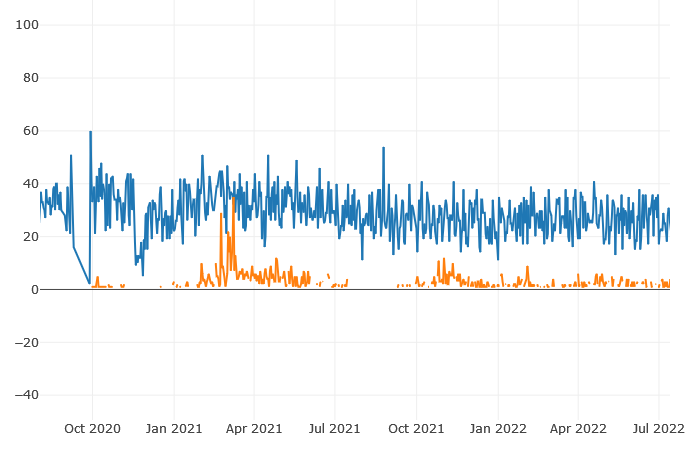

#### No. subreddit subscribers over time (blue=machinelearning / orange=TSLA):
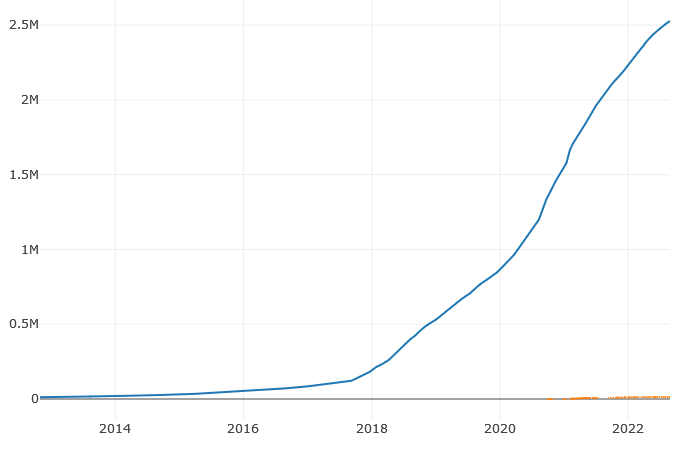

💽❓ Data Question:

6. Does there seem to be a large distribution of posters or a smaller concentration of posters who are very active? What kind of impact might this have on the data?

### *Answer:*
Difficult to tell by just eyeballing the TSLA subreddit. (The Reddit API does not appear to provide an easy method for retrieving a distribution of # author posts over time.) One redditor, however, does stand out--***author:wewewawa*** has about 75 posts in the last 6 months. Dominance of the TSLA subreddit by a few active users would likely skew the data retrieved toward their style and content.